In [1]:
import pandas as pd

file_path = 'weatherAUS.csv'
data = pd.read_csv(file_path)

# Summarize key characteristics of the dataset: number of rows, columns, and feature names
dataset_summary = {
    "Number of Rows": data.shape[0],
    "Number of Columns": data.shape[1],
    "Columns": list(data.columns),
    "Sample Data": data.head()
}
print(dataset_summary)


{'Number of Rows': 145460, 'Number of Columns': 23, 'Columns': ['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow'], 'Sample Data':          Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1  

In [2]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Check for missing values
print("Missing values before handling:")
print(data.isnull().sum())

# Define columns to be considered as categorical
categorical_features = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']

# Handle missing values
# For numeric columns, fill missing values with the column mean
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
data[numeric_cols] = data[numeric_cols].apply(lambda col: col.fillna(col.mean()))

# For categorical columns, fill missing values with the most frequent value
categorical_cols = data.select_dtypes(include=['object']).columns
imputer = SimpleImputer(strategy='most_frequent')
data[categorical_cols] = imputer.fit_transform(data[categorical_cols])

# Verify no missing values remain
print("Missing values after handling:")
print(data.isnull().sum())

Missing values before handling:
Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64
Missing values after handling:
Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm        

In [3]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

# Load the dataset
file_path = 'weatherAUS.csv'
data = pd.read_csv(file_path)

# Identify numeric and categorical columns
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = data.select_dtypes(include=['object']).columns

# Normalize numeric columns
scaler = MinMaxScaler()
data[numeric_cols] = scaler.fit_transform(data[numeric_cols])

# Encode categorical columns except "Location" and create a mapping for "Location"
label_encoders = {}
category_mappings = {}

for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    data[col] = label_encoders[col].fit_transform(data[col].astype(str))  # Convert to string to handle NaNs
    # Store the mapping for reference
    category_mappings[col] = dict(enumerate(label_encoders[col].classes_))

# Restore the "Location" column to its original names
data['Location'] = data['Location'].map(category_mappings['Location'])

# Display the normalized and encoded data
print(data.head())


   Date Location   MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
0   396   Albury  0.516509  0.523629  0.001617          NaN       NaN   
1   397   Albury  0.375000  0.565217  0.000000          NaN       NaN   
2   398   Albury  0.504717  0.576560  0.000000          NaN       NaN   
3   399   Albury  0.417453  0.620038  0.000000          NaN       NaN   
4   400   Albury  0.613208  0.701323  0.002695          NaN       NaN   

   WindGustDir  WindGustSpeed  WindDir9am  ...  Humidity9am  Humidity3pm  \
0           13       0.294574          13  ...         0.71         0.22   
1           14       0.294574           6  ...         0.44         0.25   
2           15       0.310078          13  ...         0.38         0.30   
3            4       0.139535           9  ...         0.45         0.16   
4           13       0.271318           1  ...         0.82         0.33   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm   Temp9am   Temp3pm  \
0     0.449587       0.4800  0.88

In [4]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc


# Separate features and target
X = data.drop(['RainTomorrow', 'Date'], axis=1)  # Removing 'Date' as it's not a relevant feature
y = data['RainTomorrow']

# Ensure binary encoding for 'RainTomorrow' (0/1)
y = y.apply(lambda x: 1 if x > 0 else 0)

# Convert categorical features to numerical using one-hot encoding
X = pd.get_dummies(X, drop_first=True)

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Best C value: 1
Accuracy: 0.8366

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.94      0.90     22012
           1       0.73      0.52      0.61      7080

    accuracy                           0.84     29092
   macro avg       0.79      0.73      0.75     29092
weighted avg       0.83      0.84      0.83     29092



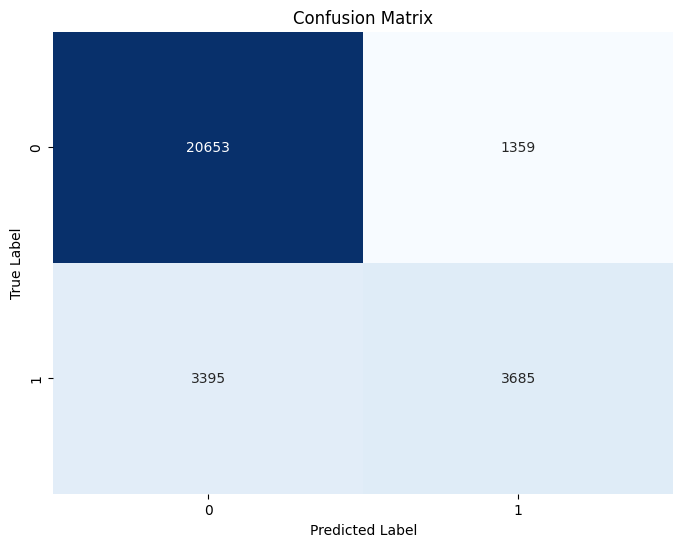

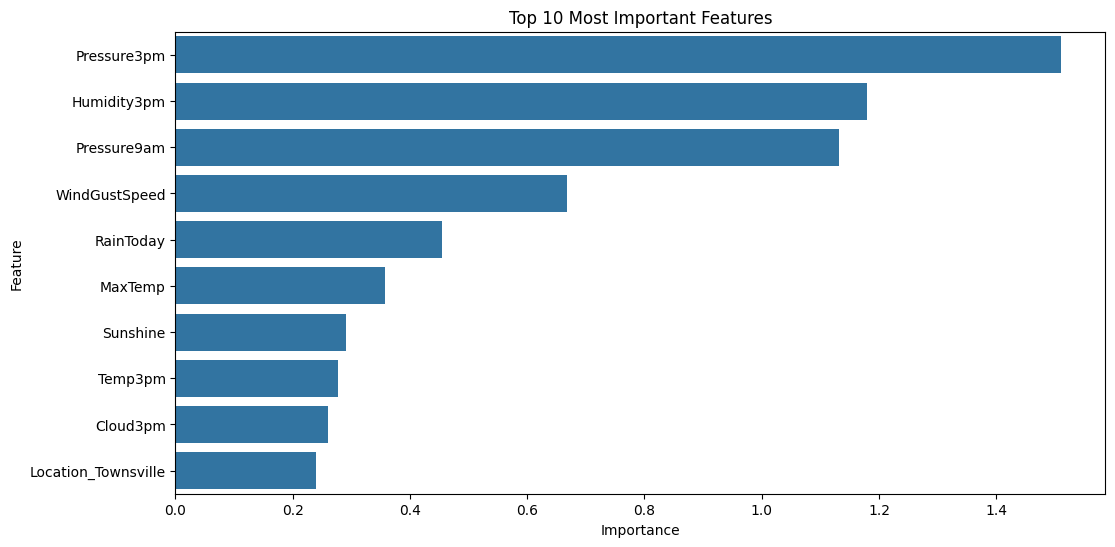


Model Performance Metrics:
Accuracy: 0.8366

Top 10 Most Important Features:
                Feature  Importance
14          Pressure3pm    1.510564
12          Humidity3pm    1.178681
13          Pressure9am    1.132538
6         WindGustSpeed    0.667428
19            RainToday    0.454501
1               MaxTemp    0.357712
4              Sunshine    0.290656
18              Temp3pm    0.277842
16             Cloud3pm    0.261063
58  Location_Townsville    0.239320


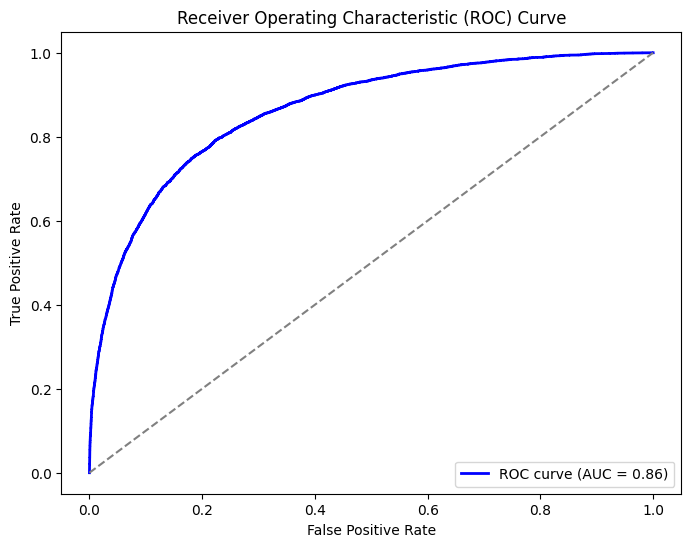


AUC Score: 0.8637


In [ ]:
# Define the model and parameter grid for hyperparameter tuning
log_reg = LogisticRegression(max_iter=1000, random_state=42)
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}  # Testing various C values

# Perform grid search with cross-validation
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Best model from grid search
best_log_reg = grid_search.best_estimator_
print(f"Best C value: {grid_search.best_params_['C']}")

# Make predictions with the best model
y_pred = best_log_reg.predict(X_test_scaled)
y_pred_proba = best_log_reg.predict_proba(X_test_scaled)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Print detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Create confusion matrix with a 2x2 format
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': abs(best_log_reg.coef_[0])
})
feature_importance = feature_importance.sort_values('Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(10))
plt.title('Top 10 Most Important Features')
plt.show()

# Print model performance metrics
print("\nModel Performance Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print("\nTop 10 Most Important Features:")
print(feature_importance.head(10))

# Calculate ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Print the AUC score
print(f"\nAUC Score: {roc_auc:.4f}")

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Accuracy: 0.8357

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.95      0.90     22012
           1       0.77      0.46      0.58      7080

    accuracy                           0.84     29092
   macro avg       0.81      0.71      0.74     29092
weighted avg       0.83      0.84      0.82     29092


Confusion Matrix:
[[21021   991]
 [ 3789  3291]]


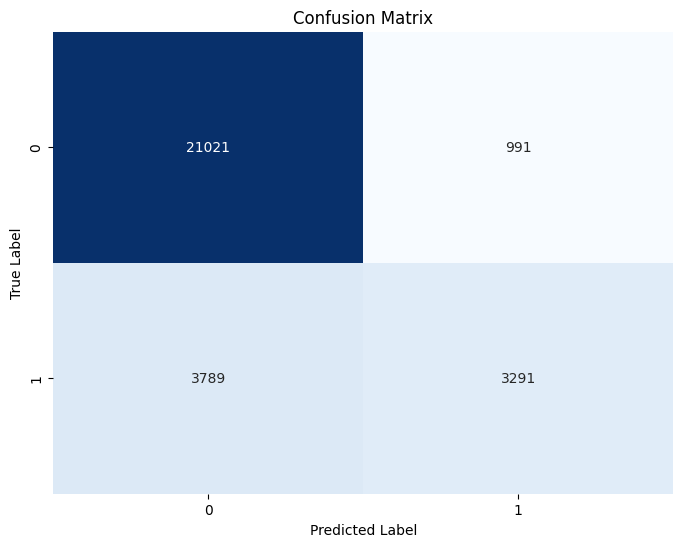


Best Parameters:
{'knn__n_neighbors': 19}


In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from scipy.stats import randint

# Define the K-Nearest Neighbors classifier
knn = KNeighborsClassifier()

# Create a pipeline
operations = [('scaler', StandardScaler()), ('knn', knn)]
pipe = Pipeline(operations)

# Define the parameter distribution for RandomizedSearchCV
param_dist = {'knn__n_neighbors': randint(1, 20)}  # Random values for n_neighbors between 1 and 20

# Perform RandomizedSearchCV with 10 random samples
random_search = RandomizedSearchCV(pipe, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', random_state=42)
random_search.fit(X_train, y_train)

# Get the best model and parameters
best_model = random_search.best_estimator_
best_params = random_search.best_params_

# Make predictions using the best model
y_pred = best_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Print detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Print the best parameters
print("\nBest Parameters:")
print(best_params)


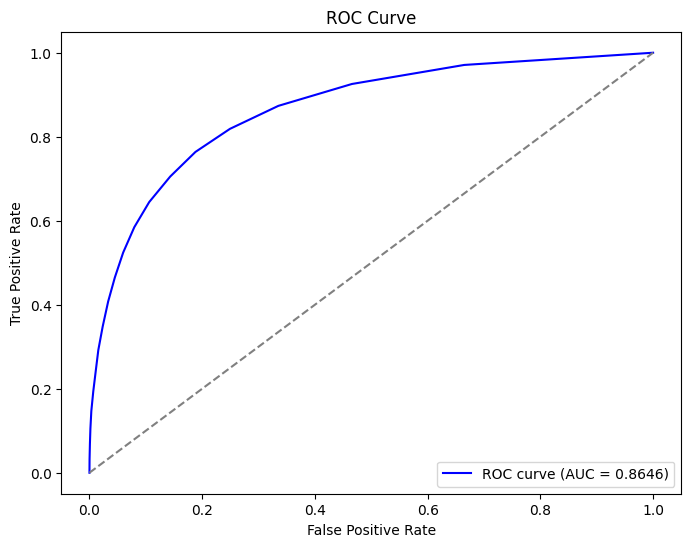


Best Parameters:
{'knn__n_neighbors': 19}


In [9]:
# Plot ROC curve
y_pred_proba = best_model.predict_proba(X_test)[:, 1]  # Get probability of the positive class
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Print the best parameters
print("\nBest Parameters:")
print(best_params)

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Define the parameter grid for RandomizedSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2',None]
}

# Initialize the model
rf = RandomForestClassifier(random_state=42)

# Perform Randomized Search with cross-validation
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_grid,
    n_iter=20,  # Number of parameter settings sampled
    scoring='accuracy',
    cv=3,       # 3-fold cross-validation
    verbose=2,
    random_state=42,
    n_jobs=-1   # Use all available processors
)

# Fit the random search model
random_search.fit(X_train, y_train)


Fitting 3 folds for each of 20 candidates, totalling 60 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30, None],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200]},
                   random_state=42, scoring='accuracy', verbose=2)

In [6]:
# Adjust display options to show the full content in each cell
pd.set_option('display.max_colwidth', None)

# Display sorted DataFrame with all parameters fully visible
results_df = pd.DataFrame(random_search.cv_results_)[['params', 'mean_test_score', 'rank_test_score']].sort_values('rank_test_score')
results_df.head()  # Display result

,params,mean_test_score,rank_test_score
11,"{'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 30}",0.852253,1
2,"{'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 20}",0.852159,2
15,"{'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': None}",0.851970,3
10,"{'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 30}",0.851609,4
12,"{'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': 30}",0.850801,5


Best Model Accuracy: 0.8498556304138595
Classification Report for Best Model:
              precision    recall  f1-score   support

           0       0.86      0.95      0.91     22012
           1       0.78      0.53      0.63      7080

    accuracy                           0.85     29092
   macro avg       0.82      0.74      0.77     29092
weighted avg       0.84      0.85      0.84     29092

Confusion Matrix for Best Model:
[[20947  1065]
 [ 3303  3777]]


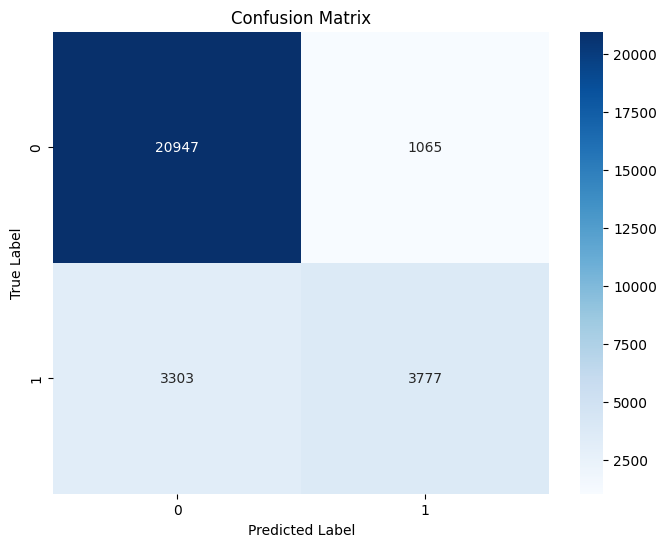

Best Hyperparameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 30}


In [7]:
# Get the best model
best_rf_model = random_search.best_estimator_

# Predict on the test set
y_pred = best_rf_model.predict(X_test)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Best Model Accuracy:", accuracy)

# Detailed performance metrics
print("Classification Report for Best Model:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix for Best Model:")
print(confusion_matrix(y_test, y_pred))

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Display best parameters
print("Best Hyperparameters:", random_search.best_params_)


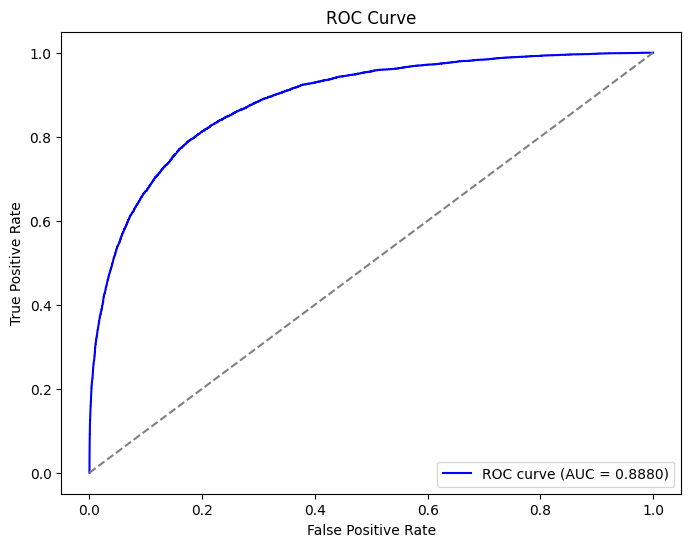

Best Hyperparameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 30}


In [8]:
# Plot ROC curve
y_pred_proba = best_rf_model.predict_proba(X_test)[:, 1]  # Get probability of the positive class
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Display best parameters
print("Best Hyperparameters:", random_search.best_params_)

Top 10 Features by Importance:
          Feature  Importance
12    Humidity3pm    0.146435
2        Rainfall    0.059533
14    Pressure3pm    0.058163
11    Humidity9am    0.052436
4        Sunshine    0.051828
13    Pressure9am    0.051534
6   WindGustSpeed    0.050685
18        Temp3pm    0.047445
0         MinTemp    0.045934
1         MaxTemp    0.045225


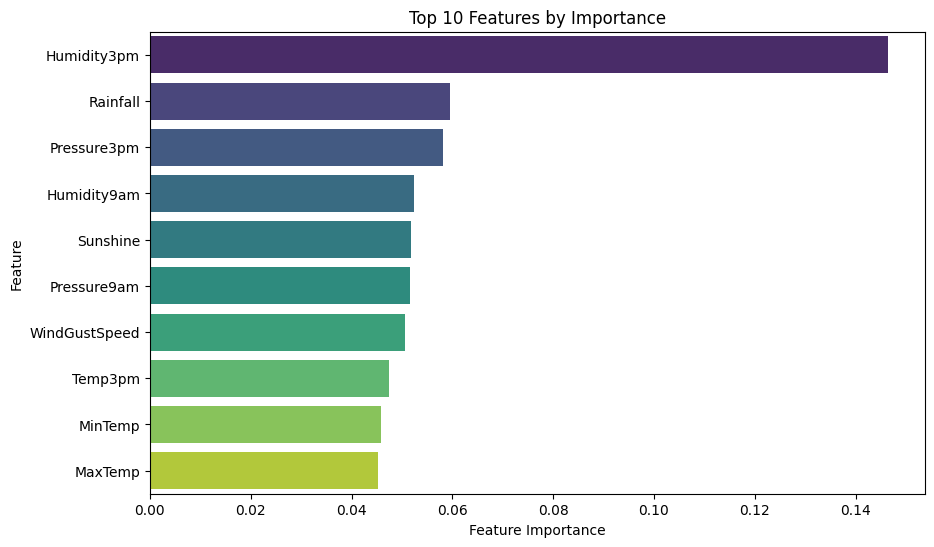

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Get feature importances from the best model
feature_importances = best_rf_model.feature_importances_

# Create a DataFrame with feature names and their importance scores
features_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

# Sort the features by importance, descending
top_features = features_df.sort_values(by='Importance', ascending=False).head(10)

# Display the top 10 features
print("Top 10 Features by Importance:")
print(top_features)

# Optional: Plot the top 10 features
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=top_features, hue='Feature', dodge=False, palette='viridis', legend=False)
plt.title('Top 10 Features by Importance')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

In [ ]:
# from sklearn.model_selection import train_test_split, RandomizedSearchCV
# from sklearn.svm import SVC
# from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
# from sklearn.preprocessing import StandardScaler
# import pandas as pd
# from scipy.stats import uniform, randint

# Separate features and target
# X = data.drop(['RainTomorrow', 'Date'], axis=1)  # Removing 'Date' as it's not a relevant feature
# y = data['RainTomorrow']

# One-Hot Encode categorical columns (e.g., city names or other string values)
# X_encoded = pd.get_dummies(X)

# Check for missing values and handle them by filling with the mean of the column
# X_encoded = X_encoded.fillna(X_encoded.mean())

# Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Scale the features to have zero mean and unit variance
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# Initialize the SVM model
# svm_model = SVC(random_state=42)

# Define the parameter distribution for RandomizedSearchCV
# param_dist = {
#     'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],  # Types of kernels to try
#     'C': uniform(0.1, 100),  # Uniform distribution for C between 0.1 and 100
#     'gamma': ['scale', 'auto', 0.1, 1, 10],  # Fixed values for gamma
#     'degree': randint(2, 6)  # Integer values for degree between 2 and 5 (only for poly kernel)
# }

# Initialize RandomizedSearchCV with the SVM model and the parameter distribution
# random_search = RandomizedSearchCV(
#     svm_model, param_distributions=param_dist, n_iter=10, cv=5, random_state=42, n_jobs=-1, verbose=1
# )

# Fit the model on the training data
# random_search.fit(X_train_scaled, y_train)

# Print the best parameters from the random search
# print(f"Best parameters: {random_search.best_params_}")

# Get the best estimator (model) from RandomizedSearchCV
# best_svm_model = random_search.best_estimator_

# Make predictions with the best model
# y_pred = best_svm_model.predict(X_test_scaled)

# Evaluate the model
# accuracy = accuracy_score(y_test, y_pred)
# print(f"Accuracy: {accuracy:.4f}")

# Print detailed classification report
# print("\nClassification Report:")
# print(classification_report(y_test, y_pred))

# Plot Confusion Matrix
# cm = confusion_matrix(y_test, y_pred)
# disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_svm_model.classes_)
# disp.plot(cmap='Blues')  # Using a blue colormap for better visualization
# plt.title("Confusion Matrix")
# plt.show()


Fitting 5 folds for each of 10 candidates, totalling 50 fits


KeyboardInterrupt: 